# Data

https://www.ncei.noaa.gov/cdo-web/search;jsessionid=2D95F92B8DB0DC1573F4CDD610443172

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [61]:
weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/local_weather.csv", index_col="DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


# Preparando os dados para treino e teste


In [62]:
# Chama uma função com um dado valor 'this' e 'arguments' providos como uma array (ou um objeto parecido com um array)
# Pegar a porcentagem de valores nulos das linhas
(weather.apply(pd.isnull).sum()/weather.shape[0]) * 100

STATION     0.000000
NAME        0.000000
ACMH       65.336022
ACSH       65.336022
AWND       52.245092
DAPR       99.952548
FMTM       87.009906
FRGT       99.988137
MDPR       99.952548
PGTM       49.510647
PRCP        1.666766
SNOW       32.498962
SNWD       31.763450
TAVG       87.917433
TMAX        0.053384
TMIN        0.059315
TSUN       93.172786
WDF1       65.336022
WDF2       52.239160
WDF5       52.755205
WDFG       74.690077
WSF1       65.336022
WSF2       52.233229
WSF5       52.755205
WSFG       74.690077
WT01       77.993950
WT02       98.024794
WT03       99.294146
WT04       99.976274
WT05       99.833917
WT07       99.988137
WT08       81.036835
WT09       99.988137
WT16       88.403820
WT18       99.982205
dtype: float64

In [63]:
# Vamos filtrar apenas as colunas que vamos usar e criar um novo DataFrame

# Retorna uma cópia do DataFrame. Quaisquer alterações feitas no DataFrame original NÃO serão refletidas na cópia
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

# Em seguida iremos renomear cada uma delas
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [64]:
core_weather.apply(pd.isnull).sum()

precip         281
snow          5479
snow_depth    5355
temp_max         9
temp_min        10
dtype: int64

In [65]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [66]:
# Houve apenas um dia que nevou, e nesse dia só nevou uma polegada
# Não há nada que podemos apoveitar nessa coluna, pois, não terão dados históricos para eles
del core_weather["snow"]

In [67]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [68]:
# Não ouve aculmulo de neve, então deletar
del core_weather["snow_depth"]

In [69]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [70]:
core_weather.loc["1983-10-20": "1983-11-05", : ]

# Não houve precipitação 0 por um tempo
# Se chove um dia não significa que no outro irá chover

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [71]:
core_weather.loc["2013-12-15",:]

precip       NaN
temp_max    58.0
temp_min    33.0
Name: 2013-12-15, dtype: float64

In [72]:
(core_weather["precip"].value_counts() / core_weather.shape[0]) * 100

0.00    81.048698
0.01     2.598019
0.02     1.180378
0.03     0.723649
0.04     0.605018
          ...    
1.29     0.005932
1.73     0.005932
1.05     0.005932
1.38     0.005932
1.02     0.005932
Name: precip, Length: 176, dtype: float64

In [73]:
# Como na maioria dos dias não havia precipitação, iremos substituir os nulos por 0
core_weather["precip"] = core_weather["precip"].fillna(0)

In [74]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max     9
temp_min    10
dtype: int64

In [75]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [76]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [77]:
# O método ffill() substitui os valores NULL pelo valor da linha anterior (ou coluna anterior, se o parâmetro axis estiver definido como 'columns')
core_weather = core_weather.fillna(method="ffill")

In [78]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [79]:
# Verifica o valor ausente definido na documentação de dados
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [80]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [81]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [82]:
# Datas do tipo object
# Vamos converter para Datetime
core_weather.index = pd.to_datetime(core_weather.index)

In [83]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [84]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16859)

# Visualizando dados


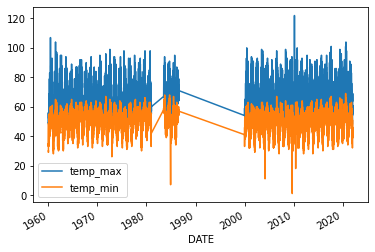

In [85]:
core_weather[["temp_max", "temp_min"]].plot()

In [86]:
# Há lacunas no gráfico
# Vamos verificar os dados ausentes nos anos
core_weather.index.year.value_counts().sort_index() # Ordem crescente

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

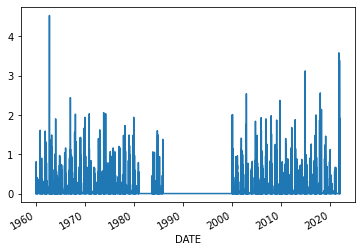

In [87]:
core_weather["precip"].plot()

In [88]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

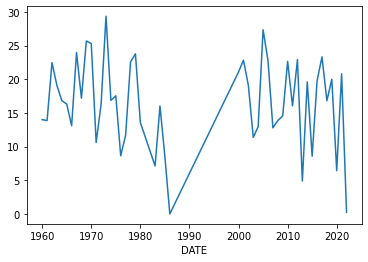

In [89]:
core_weather.groupby(core_weather.index.year).sum()["precip"].plot()

In [90]:
# Índice de deslocamento por número desejado de períodos com um tempo opcional freq. 
# Recebe um parâmetro escalar denominado período, que representa o número de deslocamentos a serem feitos no eixo desejado. 
# Função muito útil ao lidar com dados de série temporal.
core_weather["target"] = core_weather.shift(-1)["temp_max"]
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [91]:
# Valor nulo na ultima linha, vamos pegar tudo menos a ultima e copiar
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


# Vamos treinar a máquina

In [92]:
# Controla quanto os coeficientes de regressão irão ser penalizados e evitar o overfitting
reg = Ridge(alpha=.1)


# Overfitting, termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados observado, mas se mostra ineficaz para prever novos resultados.

In [93]:
# Vamos ser explicitos nas variáveis que usaremos na previsão
predictors = ["precip", "temp_max", "temp_min"]

In [94]:
# Treino será tudo até a data abaixo
train = core_weather.loc[:"2020-12-31"]

# Teste será tudo depois disso
test = core_weather.loc["2021-01-01":]

In [95]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [96]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0
2022-01-24,0.00,60.0,39.0,57.0
2022-01-25,0.00,57.0,43.0,57.0


In [97]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [98]:
predictions = reg.predict(test[predictors])

In [99]:
# Calcula taxa de erro
mean_squared_error(test["target"], predictions)

20.56066854811876

In [100]:
# Vamos concatenar de modo que possamos ver o antes e depois e comparar lado a lado
# Pegando matriz numpy e transformando em series pandas
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


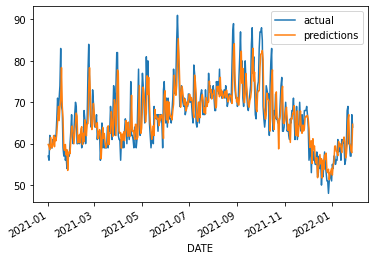

In [101]:
combined.plot()

In [102]:
# Como cada variável está sendo usada pelo modelo
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [103]:
# Temperatura média desse mês
# Nos 30 dias do dia anterior e pegue a média de cada coluna
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

# Verificando se temperatura foi diferente da média mensal
# Temperatura média mensal / temperatura naquele dia
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

# Relação entre a temperatuda máxima e mínima
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [104]:
# As 30 primeiras linhas do clima central são NaN, entã iremos removê-las
core_weather = core_weather.iloc[30:,:].copy()

In [105]:
# Função para predições
def create_predictions(predictors, core_weather, reg):
  # Treino e teste
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
  
  # Modelo de regressão
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

  # Gerar previsão
    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [106]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

20.170663808991097

In [107]:
# Temperatura media mensal historica de um determinado mês
# 1 - Temperatura máxima  
# 2 - Agrupar por cada mês 
# 3 - Levar a média de todos os valores antes do dia X 
# 4 - pegar as linhas anteriores a X e calcular a média

core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())


# Média do dia do ano
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [108]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

19.37585052643261

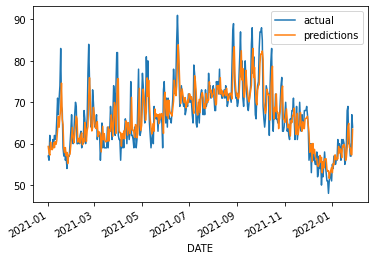

In [109]:
combined.plot()

In [110]:
reg.coef_

array([-1.07706522,  0.69350145,  0.04696919,  4.78060588,  0.07003167,
        0.16384976,  0.08581002])

In [111]:
core_weather.corr()["target"]

precip            -0.205413
temp_max           0.821650
temp_min           0.596016
target             1.000000
month_max          0.686842
month_day_max     -0.421537
max_min            0.045228
monthly_avg        0.689805
day_of_year_avg    0.712334
Name: target, dtype: float64

In [112]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min", "monthly_avg", "day_of_year_avg"]

In [113]:
error, combined = create_predictions(predictors, core_weather, reg)
error

19.37585052643261

In [114]:
reg.coef_

array([-1.07706522,  0.69350145,  0.04696919,  4.78060588,  0.07003167,
        0.16384976,  0.08581002])

In [115]:
# DIferença entre o valor real e o previsto
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

# Retorna um objeto com valor absoluto assumido e só é aplicável a objetos que são todos numéricos. 
# Também não funciona com valor Nan.abs() 
# A função também pode ser usada com números complexos para encontrar seu valor absoluto.

In [116]:
# Diferença da temperatura real e a prevista
combined.sort_values("diff", ascending = False).head(10)

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.433744,14.566256
2021-04-01,62.0,75.713379,13.713379
2021-05-07,81.0,67.678091,13.321909
2021-02-21,77.0,64.141065,12.858935
2021-10-16,66.0,78.707594,12.707594
2021-02-22,84.0,71.354231,12.645769
2021-03-30,82.0,69.994973,12.005027
2021-07-07,79.0,67.323738,11.676262
2021-03-29,74.0,62.502014,11.497986
